In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

###  예제 데이터 설명 

## 고객 정보 데이터 
* ID: 고객의 고유 식별자
* Year_Birth: 고객의 출생 연도
* Marital_Status: 고객의 결혼 여부
* Income: 고객의 연간 가계 소득
* Kidhome: 고객 가구의 어린이 수
* Teenhome: 고객 가구의 청소년 수

## Products 
* MntWines: 지난 2년 동안 와인에 소비한 금액
* MntFruits: 지난 2년 동안 과일에 소비한 금액
* MntMeatProducts: 지난 2년 동안 육류에 소비된 금액
* MntFishProducts: 지난 2년 동안 생선에 소비한 금액
* MntSweetProducts: 지난 2년간 사탕에 소비한 금액

## Place 
* NumWebPurchases: 회사 웹사이트를 통해 이루어진 구매 수
* NumCatalogPurchases: 카탈로그를 사용하여 이루어진 구매 수
* NumStorePurchases: 매장에서 직접 구매한 횟수
* NumWebVisitsMonth: 지난 달 회사 웹 사이트 방문 횟수



# 1번 문제 EDA 

1. 결측치를 확인하고, 결측치 제거하세요. 
2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타내세요. 
3. 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하세요. 


In [99]:
data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem1.csv")
data.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5


### 1-1. 결측치를 확인하고, 결측치 제거하시오 

In [100]:
data.isna().sum()

ID                      0
Year_Birth              0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

In [101]:
for idx in data.loc[data['Income'].isna()].index:
    birth = data.loc[idx, 'Year_Birth']
    data.loc[idx, 'Income'] = data[data.Year_Birth==1957]['Income'].mean()

data.isna().sum()

ID                     0
Year_Birth             0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [102]:
print('<답안>')
print('확인 결과, Income 변수에서 24개의 결측치가 발견되었다. 이는 인구통계 정보를 통해 추정하는 것이 가장 적합하다고 판단되며, 생년월일에 따른 평균 값으로 대치한다. 대치 이후, 결측치가 사라진 것을 확인할 수 있다.')

<답안>
확인 결과, Income 변수에서 24개의 결측치가 발견되었다. 이는 인구통계 정보를 통해 추정하는 것이 가장 적합하다고 판단되며, 생년월일에 따른 평균 값으로 대치한다. 대치 이후, 결측치가 사라진 것을 확인할 수 있다.


In [103]:
data[data.Year_Birth==1957]['Income'].mean()

54020.26829268293

## 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타내세요.

In [104]:
cat_data = ['Marital_Status']
num_data = list(data.columns.difference(cat_data))

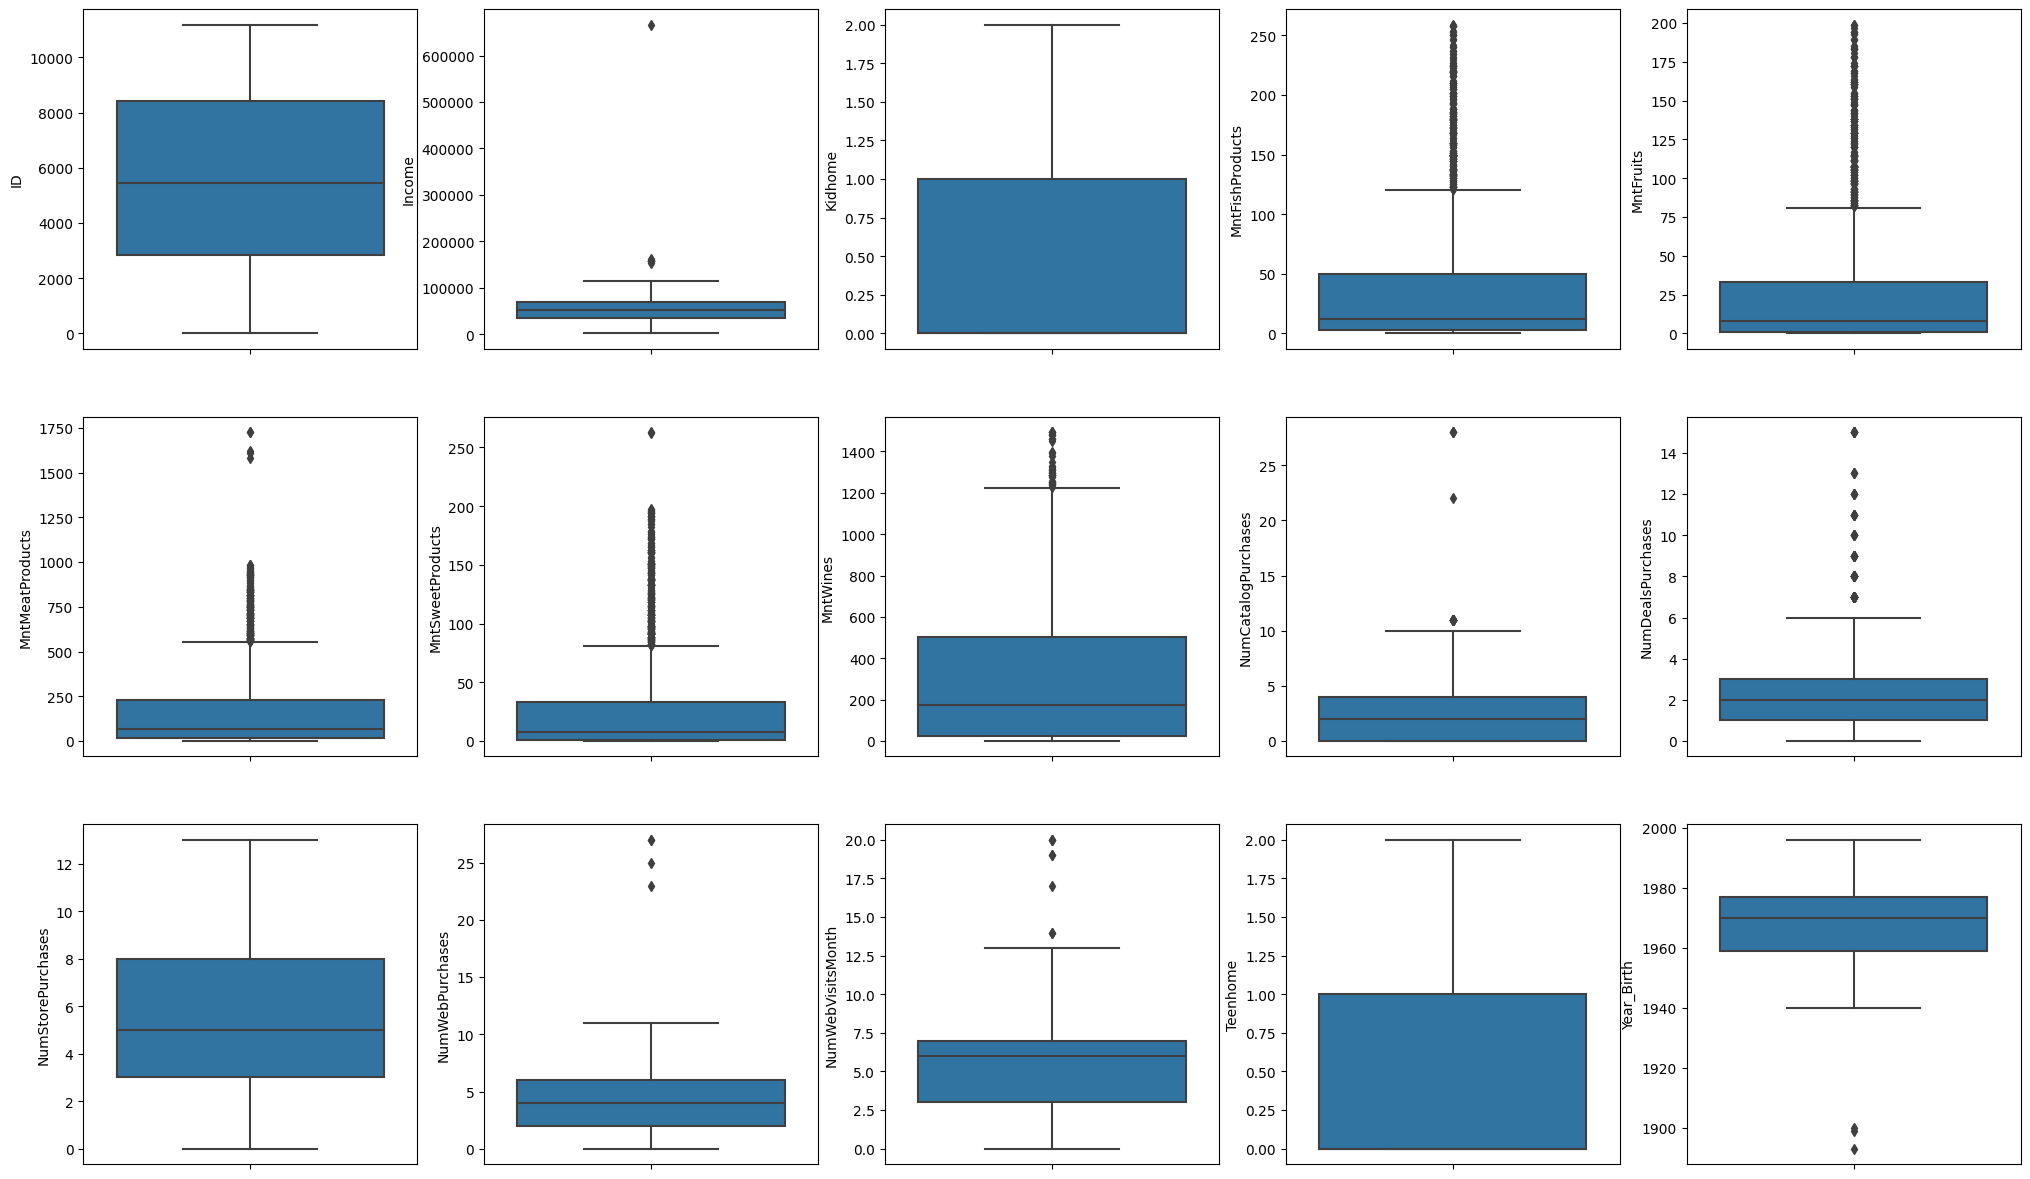

In [105]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15))
for i, col in enumerate(num_data):
    n_row = i//5
    n_col = i%5
    sns.boxplot(y=col, data=data, ax=axes[n_row][n_col])
    axes[n_row][n_col].set_ylabel = col

In [106]:
data['age'] = 2023 - data['Year_Birth'] + 1
data_rm = data[data['age'] <= 120]
data_rm.drop('Year_Birth', axis=1, inplace=True)
data_rm = data_rm[data_rm['Income'] <= 600000]

/var/folders/1m/4rsksycx3qvf5nrg_td3lpxw0000gn/T/ipykernel_44397/2482116091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rm.drop('Year_Birth', axis=1, inplace=True)


In [108]:
log_col = list(data_rm.columns.difference(['ID', 'age', 'Income', 'Kidhome', 'Teenhome'] + cat_data))
for col in log_col:
    data_rm[col + '_log'] = np.log1p(data_rm[col])
    # data_rm.drop(col, axis=1, inplace=True)

In [113]:
print('<답안>')
print('Boxplot 확인 결과, IQR method를 사용했을 때 이상치로 판단되는 데이터가 눈에 띈다. 다만 Products, Place 관련 변수들의 경우 이상치가 정말로 삭제해야 하는 이상치인지 도메인 지식 없이는 판단이 불가능하므로, 지금은 그냥 두기로 한다. 대신 로그 변환을 통해 모델링을 할 때 이상치의 영향을 감소시키고자 하였다.')
print('인구통계학적 변수 중 Year_Birth 변수의 이상치의 경우 나이 변수로 변환하였고, 120세 이상인 데이터로 확인되었다. 120세 이상의 경우 현실 세계에서 존재하기 어려우므로, 삭제한다. 마찬가지로, Income 에서는 $666666 값을 가지는 변수를 삭제한다.')
print('먼저, Products, Place 관련 10개 변수들의 로그 변환 전후 Boxplot을 살펴보겠다. log 변환 적용 후에, 이상치의 개수가 대폭 줄어들었음이 확인된다. 위 10개는 log 변환 전, 아래 10개는 log 변환 후의 변수 분포 그래프이다.')

<답안>
Boxplot 확인 결과, IQR method를 사용했을 때 이상치로 판단되는 데이터가 눈에 띈다. 다만 Products, Place 관련 변수들의 경우 이상치가 정말로 삭제해야 하는 이상치인지 도메인 지식 없이는 판단이 불가능하므로, 지금은 그냥 두기로 한다. 대신 로그 변환을 통해 모델링을 할 때 이상치의 영향을 감소시키고자 하였다.
인구통계학적 변수 중 Year_Birth 변수의 이상치의 경우 나이 변수로 변환하였고, 120세 이상인 데이터로 확인되었다. 120세 이상의 경우 현실 세계에서 존재하기 어려우므로, 삭제한다. 마찬가지로, Income 에서는 $666666 값을 가지는 변수를 삭제한다.
먼저, Products, Place 관련 10개 변수들의 로그 변환 전후 Boxplot을 살펴보겠다. log 변환 적용 후에, 이상치의 개수가 대폭 줄어들었음이 확인된다. 위 10개는 log 변환 전, 아래 10개는 log 변환 후의 변수 분포 그래프이다.


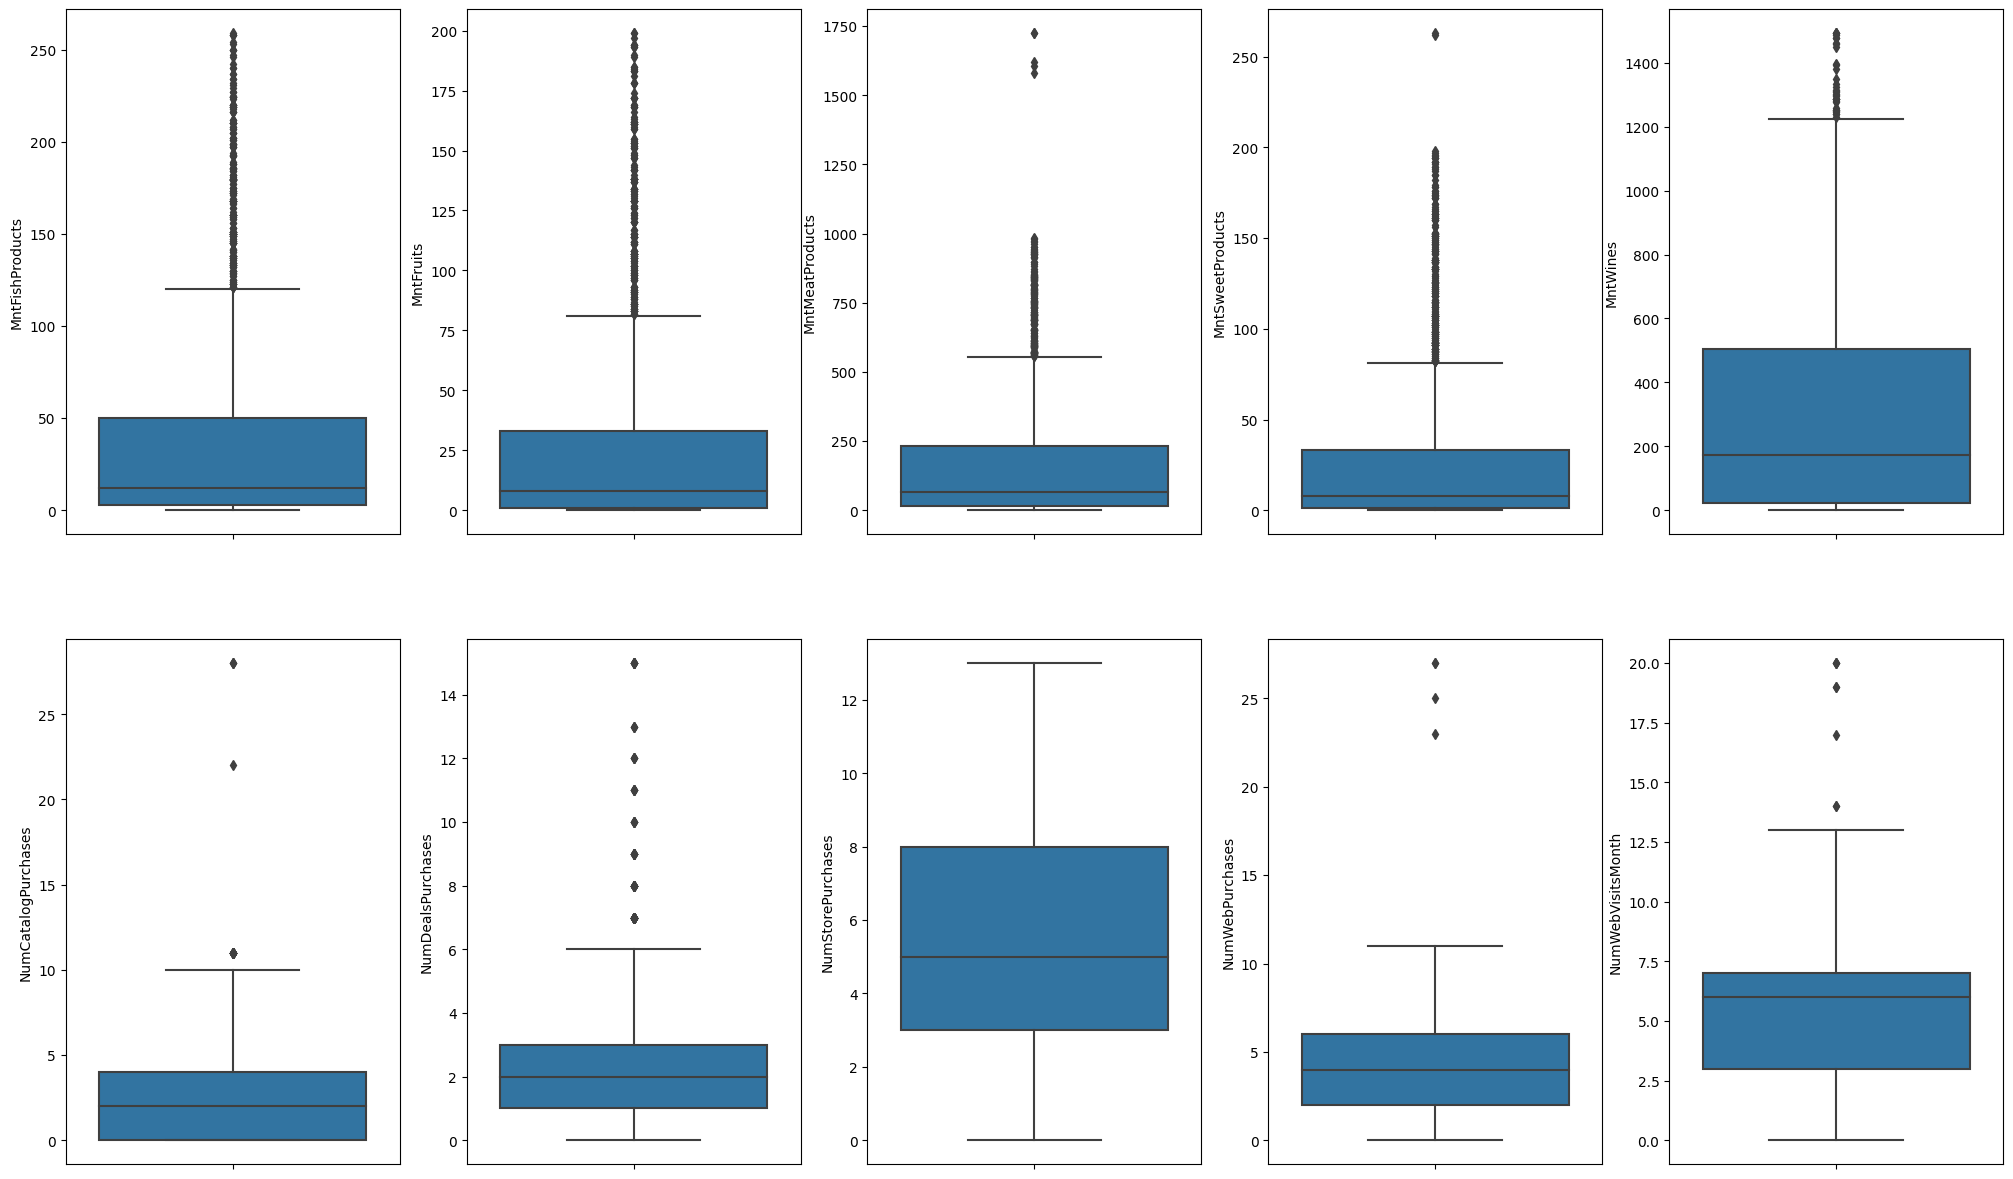

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 15))
for i, col in enumerate(log_col):
    n_row = i//5
    n_col = i%5
    sns.boxplot(y=col, data=data_rm, ax=axes[n_row][n_col])
    axes[n_row][n_col].set_ylabel = col

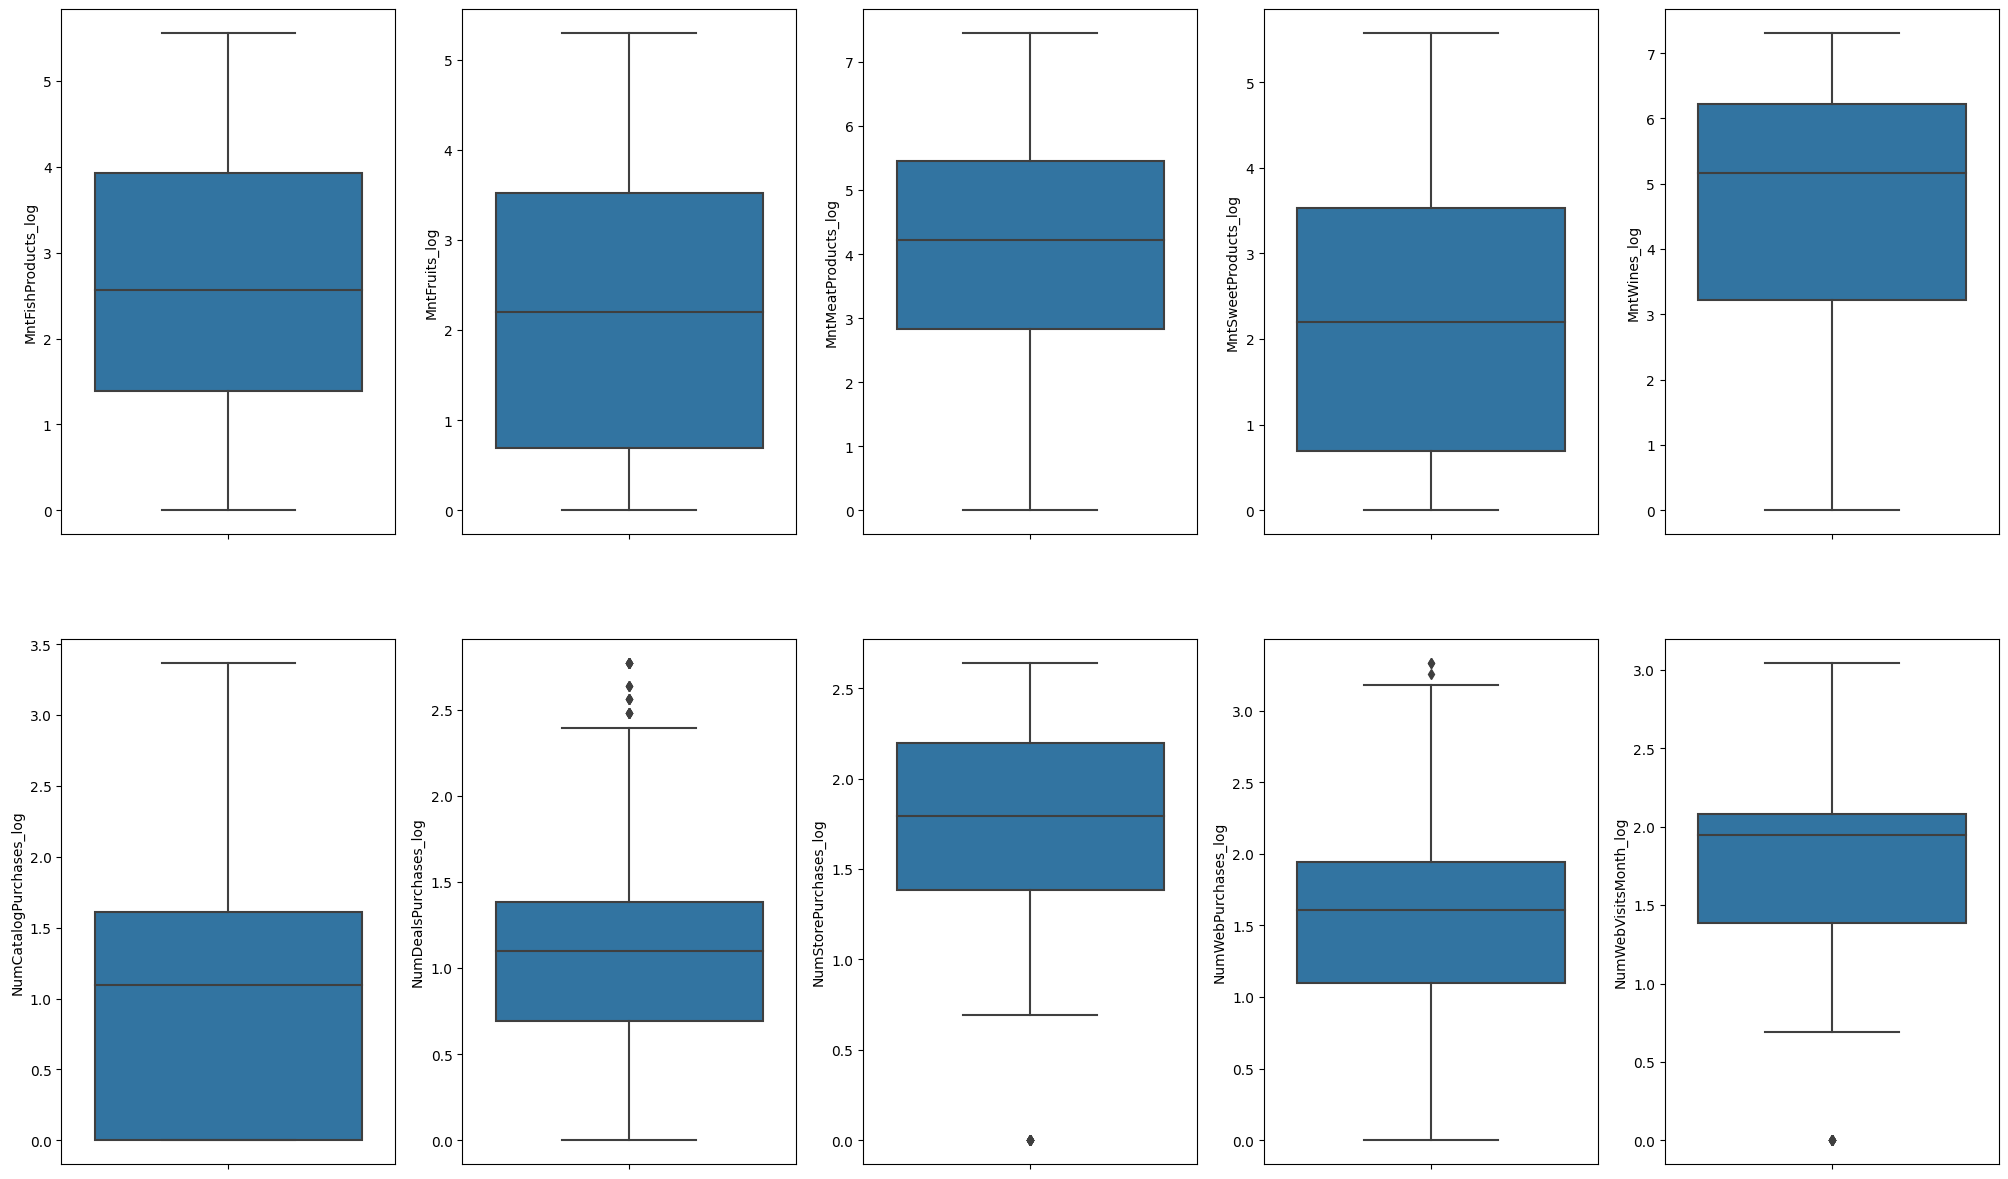

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 15))
for i, col in enumerate(log_col):
    n_row = i//5
    n_col = i%5
    sns.boxplot(y=col + '_log', data=data_rm, ax=axes[n_row][n_col])
    axes[n_row][n_col].set_ylabel = col

In [61]:
print('아래의 Boxplot은 이상치 제거 전후와 age와 Income 변수의 분포 변화이다. 변환 전의 변수 분포는 왼쪽, 변환 후의 변수 분포는 오른쪽이다. Income 변수의 경우, 최극단값이 없어지면서 이전에는 이상치가 아니었던 변수가 이상치로 추가 판단되는 모습을 보인다.')

아래의 Boxplot은 이상치 제거 전후와 age와 Income 변수의 분포 변화이다. 변환 전의 변수 분포는 왼쪽, 변환 후의 변수 분포는 오른쪽이다. Income 변수의 경우, 최극단값이 없어지면서 이전에는 이상치가 아니었던 변수가 이상치로 추가 판단되는 모습을 보인다.


<Axes: ylabel='age'>

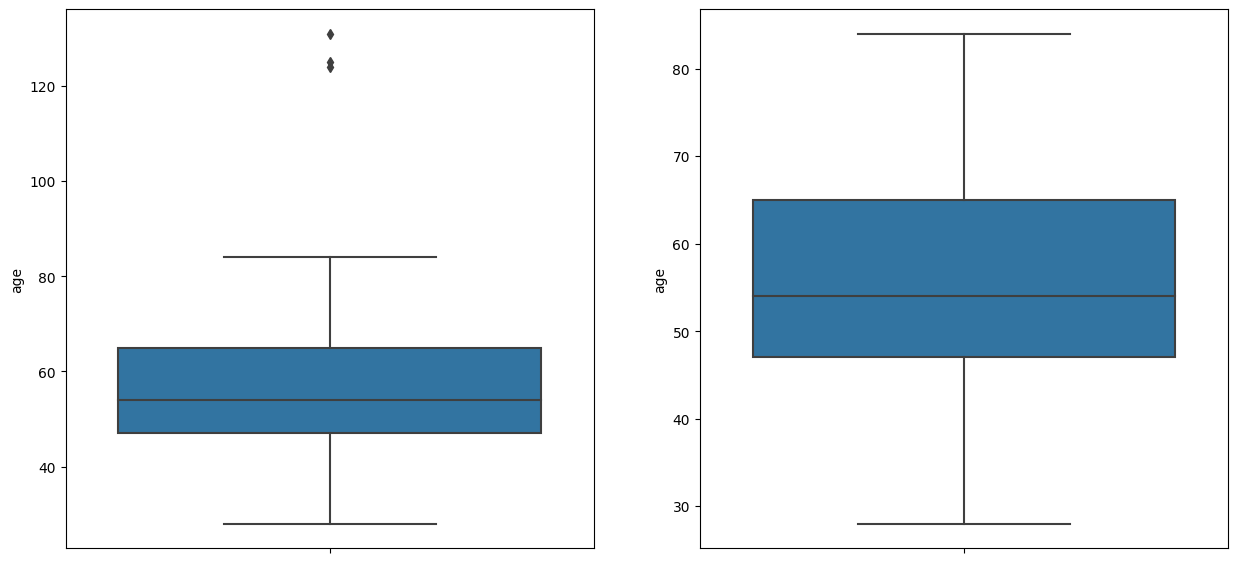

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 7))
sns.boxplot(y='age', data=data, ax=axes[0])
sns.boxplot(y='age', data=data_rm, ax=axes[1])

<Axes: ylabel='Income'>

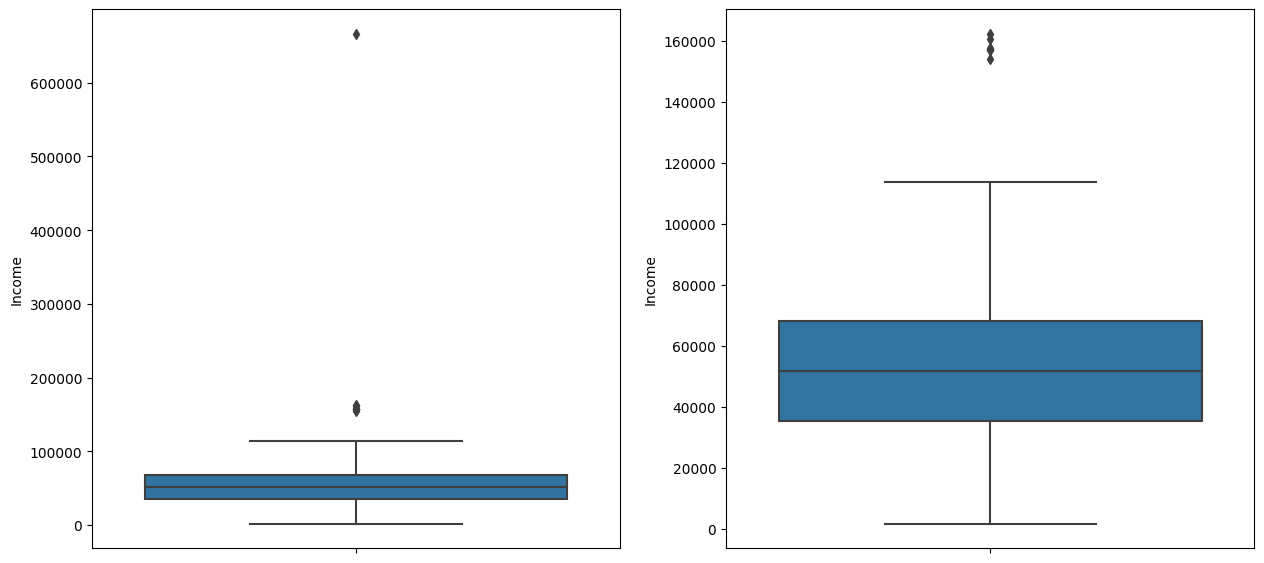

In [58]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 7))
sns.boxplot(y='Income', data=data, ax=axes[0])
sns.boxplot(y='Income', data=data_rm, ax=axes[1])

# 1-3. 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하세요.

In [158]:
from sklearn.preprocessing import RobustScaler

In [159]:
dummies = pd.get_dummies(data_rm.loc[:, cat_data])

for col in dummies.columns:
    dummies[col] = np.where(dummies[col], 1, 0)

input_data = pd.concat([data_rm.loc[:, [col + '_log' for col in log_col] + ['age', 'Income', 'Kidhome', 'Teenhome']], dummies], axis=1)

scaler = RobustScaler()
scaled = scaler.fit_transform(input_data)

In [160]:
print('군집 모델의 input에 필요한 변수들을 정리하여 input_data에 담았다. Marital_Status의 경우 Categorical 변수이므로, 더미 변수를 만드는 인코딩 작업을 추가한다.')
print('Input data에는 outlier가 존재하는 변수들이 있으므로, RobustScaler를 이용하여 Scaling 진행한다.')

군집 모델의 input에 필요한 변수들을 정리하여 input_data에 담았다. Marital_Status의 경우 Categorical 변수이므로, 더미 변수를 만드는 인코딩 작업을 추가한다.
Input data에는 outlier가 존재하는 변수들이 있으므로, RobustScaler를 이용하여 Scaling 진행한다.


In [161]:
from sklearn.cluster import KMeans

In [162]:
### elbow plot
def elbow(x):
    sse=[]
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
    print(sse)

/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

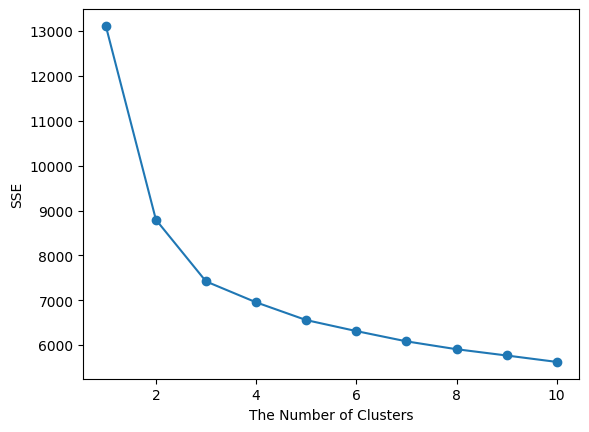

[13115.593455789605, 8794.796414148776, 7419.3879700374855, 6953.295682553784, 6557.492312947492, 6312.2996881515355, 6083.335936179378, 5907.9068853883955, 5767.962919709675, 5624.775660095991]


In [163]:
elbow(scaled)

In [164]:
# 최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(scaled)

# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
data_rm['cluster'] = new_labels

/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [165]:
print('Elbow method로 최적 군집을 서치한 결과, n=3에서 elbow가 형성되는 것으로 보인다. 따라서 n=3으로 데이터를 클러스터링하고, 이를 data에 컬럼으로 추가하였다.')

Elbow method로 최적 군집을 서치한 결과, n=3에서 elbow가 형성되는 것으로 보인다. 따라서 n=3으로 데이터를 클러스터링하고, 이를 data에 컬럼으로 추가하였다.


# 2. 군집분석

1. 위에서 생성한 군집들의 특성을 분석하세요. 
2. 각 군집 별 상품을 추천하세요.  
3. ID가 10870인 고객을 대상으로 상품을 추천하세요.


### 2-1. 위에서 생성한 군집들의 특성을 분석하세요.

In [173]:
cluster_summary = data_rm.loc[:, list(data.columns.difference(['ID', 'Year_Birth', 'Marital_Status'])) + ['cluster']].groupby('cluster').mean()
cluster_summary

,Income,Kidhome,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Teenhome,age
cluster,,,,,,,,,,,,,,
0,55264.452712,0.347398,28.257384,20.589311,126.797468,20.790436,415.810127,2.807314,3.891702,7.067511,6.036568,6.154712,0.869198,58.919831
1,33080.437677,0.817362,5.448703,3.825254,17.928974,4.249154,26.863585,0.429538,1.871477,2.926719,1.843292,6.521984,0.422773,51.694476
2,74598.748184,0.032915,92.487461,63.826019,418.995298,65.832288,565.141066,5.608150,1.213166,8.366771,5.036050,2.714734,0.219436,55.584639


In [169]:
data_rm.loc[:, ['Marital_Status', 'cluster']].groupby('cluster').value_counts()

cluster  Marital_Status
0        Married           285
         Together          190
         Single            114
         Divorced           88
         Widow              31
         YOLO                2
         Alone               1
1        Married           349
         Together          222
         Single            209
         Divorced           86
         Widow              19
         Alone               2
2        Married           230
         Together          166
         Single            156
         Divorced           57
         Widow              27
         Absurd              2
Name: count, dtype: int64

In [170]:
print('클러스터 1은 상대적으로 Income이 낮으며, Kid가 집에 있는 숫자가 상대적으로 많고 연령대 평균이 50대 초반으로 다른 군집에 비해 어리다. 구매 수량이나 구매 횟수도 다른 군집에 비해 대체로 적고, 월 웹 페이지 방문 수 평균이 높다.')
print('클러스터 2는 상대적으로 Income이 높으며, Kid와 Teen이 집에 있는 숫자가 적다. 연령대 평균이 50대 중반이고, 높은 Income을 바탕으로 하고 있어 구매 수량이 가장 높다 (구매력이 높다).')
print('클러스터 0은 Income 평균이 중간 위치에 있고 연령대 평균이 50대 후반으로 높아서 Teen이 집에 있는 숫자가 상대적으로 많다. 와인 구매 비율이 가장 높으며, 웹 구매 빈도가 높다.')
print('각 클러스터의 결혼 상태를 조사해 보니, 일부 상태에서 차이는 존재하는 각 상태의 순서는 대체로 일치한다.')

클러스터 1은 상대적으로 Income이 낮으며, Kid가 집에 있는 숫자가 상대적으로 많고 연령대 평균이 50대 초반으로 다른 군집에 비해 어리다. 구매 수량이나 구매 횟수도 다른 군집에 비해 대체로 적으나 월 웹 페이지 방문 수 평균은 높다.
클러스터 2는 상대적으로 Income이 높으며, Kid와 Teen이 집에 있는 숫자가 적다. 연령대 평균이 50대 중반이고, 높은 Income을 바탕으로 한 구매 수량과 구매하는 카탈로그나 상점의 종류가 다양하다.
클러스터 0은 Income 평균이 중간 위치에 있고 연령대 평균이 50대 후반으로 높아서 Teen이 집에 있는 숫자가 상대적으로 많다. 구매 수량이나 횟수 변수를 비교했을 때 대부분 중간 위치에 있으나, 웹 구매 빈도가 높다.
각 클러스터의 결혼 상태를 조사해 보니, 일부 상태에서 차이는 존재하는 각 상태의 순서는 대체로 일치한다.


### 2-2. 각 군집 별 상품을 추천하세요. 

In [214]:
products = ['MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']
cluster_summary.loc[:, products].sum(1)

cluster
0     612.244726
1      58.315671
2    1206.282132
dtype: float64

In [215]:
cluster_summary.loc[:, products]

,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,MntWines
cluster,,,,,
0,28.257384,20.589311,126.797468,20.790436,415.810127
1,5.448703,3.825254,17.928974,4.249154,26.863585
2,92.487461,63.826019,418.995298,65.832288,565.141066


In [216]:
cluster_summary.loc[:, products].sum(1)

cluster
0     612.244726
1      58.315671
2    1206.282132
dtype: float64

In [217]:
product_table = pd.concat([cluster_summary.loc[:, products], cluster_summary.loc[:, products].sum(1)], axis=1)

In [218]:
product_table

,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,0
cluster,,,,,,
0,28.257384,20.589311,126.797468,20.790436,415.810127,612.244726
1,5.448703,3.825254,17.928974,4.249154,26.863585,58.315671
2,92.487461,63.826019,418.995298,65.832288,565.141066,1206.282132


In [219]:
for col in product_table.columns:
    product_table.loc[:, col] = product_table[col]/product_table[0]

In [220]:
product_table

,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,0
cluster,,,,,,
0,0.046154,0.033629,0.207103,0.033958,0.679157,1.0
1,0.093435,0.065596,0.307447,0.072865,0.460658,1.0
2,0.076672,0.052911,0.347344,0.054575,0.468498,1.0


In [201]:
print('군집 별 상품을 추천하기 위해, 각 클러스터의 상품 구매 비율을 구하고, 각 군집 내에서 품목 중 구매비율이 가장 높은 상품을 추천한다.')
print('세 군집 모두 Wine의 구매 비율이 가장 높으므로, Wine을 추천한다.')

군집 별 상품을 추천하기 위해, 각 클러스터의 상품 구매 비율을 구하고, 각 군집 내에서 품목 중 구매비율이 가장 높은 상품을 추천한다.
군집 0은 Wine, 군집 1은 Sweets, 군집 2는 Meat을 각각 추천한다.


### 2-3. ID가 10870인 고객을 대상으로 상품을 추천하세요.

In [200]:
print(f'ID가 10870인 고객의 군집 번호는 {data_rm[data_rm.ID==10870].cluster.values[0]} 이므로, 군집의 대표 상품인 Wine을 추천한다.')

ID가 10870인 고객의 군집 번호는 0 이므로, 군집의 대표 상품인 Wine을 추천한다.
